## TITLE:  Forecasting Future Sales: A Predictive Analysis of Corporación Favorita Grocery

# Intro

## General

A key factor in a company's retail performance is the ability to properly estimate sales and manage inventories. The key problem is predicting the sales and inventory requirements for each location to avoid overstocking and understocking, allowing the business to offer the greatest customer service while reducing losses and guaranteeing the store's sustainability.

In this research, we the Monaco group plan to utilize sevaral time series forecasting method to forecast store sales for the Ecuadorian grocery retailer Corporation Favorita. Dates, stores, product details, whether the item was on sale, and sales statistics are all included in the training data. Separate files are also provided with further information that could be helpful in developing the models.


#####  HYPOTHESIS: 

1. Promotion positively impacts sales.

NULL: There is no significant increase in sales when product-family are on promotion 

Alternate: There is a significant increase in sales when products are on promotion 



##### BUSINESS QUESTIONS:  

1. Is the train dataset complete (has all the required dates)?

2. Which dates have the lowest and highest sales for each year?

3. Did the earthquake impact sales?

4. Are certain groups of stores selling more products? (Cluster, city, state, type)

5. Are sales affected by promotions, oil prices and holidays?

6. What analysis can we get from the date and its extractable features?

7. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)


# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [ ]:
# !pip install -q <lib_001> <lib_002> ...

#!pip install --upgrade pydantic
!pip install sweetviz


In [ ]:
#!pip install --upgrade pandas_profiling
#from pandas_profiling import ProfileReport

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [ ]:
# Data handling
import pandas as pd
import numpy as np

#display all columns and rows 
pd.set_option('display.max_columns', None)

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.pyplot as plt
import seaborn as sns 

# EDA (pandas-profiling, etc. )
#from pandas_profiling import ProfileReport
from datetime import date
import sweetviz as sv

# Feature Processing (Scikit-learn processing, etc. )
...

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os

import warnings
warnings.filterwarnings('ignore')



# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [ ]:
#load the data 

Train_df = pd.read_csv('train.csv')
stores_df = pd.read_csv('stores.csv')
Transaction_df = pd.read_csv('transactions.csv')
oil_df = pd.read_csv('oil.csv')
submission_df = pd.read_csv('sample_submission.csv')
test_df = pd.read_csv('test.csv')
Holiday_df = pd.read_csv('holidays_events.csv')

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

In [ ]:
# Generate the report
report_Train_df = sv.analyze(Train_df)

# Visualize the report
report.show_html('report_Train_df.html', open_browser=True)

Store Number: Integers representing different stores

Item Number: Integers representing different stores

family: identifies the type of product sold.

sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).

On Promotion: Telling whether the particular item sold had been assigned a special promotion pricing at the time in the specific store.
date: day the sale was made. 

In [ ]:
# Code here

# Generate the report
report_stores_df = sv.analyze(stores_df)

# Visualize the report
report.show_html('report_stores_df.html', open_browser=True)

- Store metadata, including city, state, type, and cluster.
- cluster is a grouping of similar stores.

In [ ]:
# Code here

# Generate the report
report_Transaction_df = sv.analyze(Transaction_df)

# Visualize the report
report.show_html('report_Transaction_df.html', open_browser=True)


The count of sales transactions for each date, store_nbr combination. 

In [ ]:
# Code here


# Generate the report
report_oil_df = sv.analyze(oil_df)

# Visualize the report
report.show_html('report_oil_df.html', open_browser=True)

- Daily oil price. 

- Includes values during both the train and test data timeframe. 

- (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices)

In [ ]:
# Code here


# Generate the report
report_test_df = sv.analyze(test_df)

# Visualize the report
report.show_html('report_test_df.html', open_browser=True)

Test data, with the date, store_nbr, item_nbr combinations that are to be predicted, along with the onpromotion information.

In [ ]:
# Code here


# Generate the report
report_Holiday_df = sv.analyze(Holiday_df)

# Visualize the report
report.show_html('report_Holiday_df.html', open_browser=True)


Holidays and Events, with metadata

# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

## Drop Duplicates

In [ ]:
# Use pandas.DataFrame.drop_duplicates method
Train_df.duplicated().any(), 
stores_df.duplicated().any(), 
oil_df.duplicated().any(),  
test_df.duplicated().any(),  
Holiday_df.duplicated().any() 

False

There are no duplicates in the data 

In [ ]:
#checking missing values
null_values=pd.isnull(oil_df).sum()
null_values

date           0
dcoilwtico    43
dtype: int64

oil_df has 43 missing values 

## Impute Missing Values

In [ ]:
#Filling missing values in oil data with the the value before that missing data
oil_df = oil_df.bfill()

In [ ]:
#checking missing values
null_values=pd.isnull(oil_df).sum()
null_values

date          0
dcoilwtico    0
dtype: int64

## New Features Creation

In [ ]:
#create a new column known as day which is the same as the date column
Train_df['day'] = Train_df['date']
test_df['day'] = test_df['date']

In [ ]:
Train_df.head()

,id,date,store_nbr,family,sales,onpromotion,day
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013-01-01
1,1,2013-01-01,1,BABY CARE,0.0,0,2013-01-01
2,2,2013-01-01,1,BEAUTY,0.0,0,2013-01-01
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013-01-01
4,4,2013-01-01,1,BOOKS,0.0,0,2013-01-01


In [ ]:
#Convert date column to datetime attribute for each dataset with date column 

Train_df["date"] = pd.to_datetime(Train_df["date"], format='%Y-%m-%d')
Transaction_df["date"] = pd.to_datetime(Transaction_df["date"], format='%Y-%m-%d')
oil_df["date"] = pd.to_datetime(oil_df["date"], format='%Y-%m-%d')
Holiday_df["date"] = pd.to_datetime(Holiday_df["date"], format='%Y-%m-%d')

test_df["date"] = pd.to_datetime(test_df["date"], format='%Y-%m-%d')

In [ ]:
#Merge all the dataset 
#Use left-join to main data consistency 

merged_df = pd.merge(Train_df, stores_df, on='store_nbr', how='left')
merged_df = pd.merge(merged_df,Transaction_df, on=['store_nbr','date'], how='left')
merged_df = pd.merge(merged_df,oil_df, on=['date'], how='left')
merged_df = pd.merge(merged_df,Holiday_df, on=['date'], how='left')


In [ ]:
#Check for missing values after the merge 
merged_df.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
day                   0
city                  0
state                 0
type_x                0
cluster               0
transactions     249117
dcoilwtico       878526
type_y          2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
dtype: int64

There are several missing values since we utilized a left-join 

In [ ]:
#Dealing with missing values 

#Filling the missing data using the Backfill method
merged_df["transactions"].fillna(method='bfill', inplace=True)

merged_df["dcoilwtico"].fillna(method='bfill', inplace=True)

In [ ]:
# Find the mode of the 'type_y' column
mode = merged_df['type_y'].mode()[0]

# Replace missing values in the 'type_y' column with the mode
merged_df['type_y'].fillna(mode, inplace=True)

In [ ]:
# Find the mode of the 'locale' column
mode = merged_df['locale'].mode()[0]

# Replace missing values in the 'locale' column with the mode
merged_df['locale'].fillna(mode, inplace=True)

In [ ]:
# Find the mode of the 'description' column
mode = merged_df['description'].mode()[0]

# Replace missing values in the 'description' column with the mode
merged_df['description'].fillna(mode, inplace=True)

In [ ]:
# Find the mode of the 'locale_name' column
mode = merged_df['locale_name'].mode()[0]

# Replace missing values in the 'locale_name' column with the mode
merged_df['locale_name'].fillna(mode, inplace=True)

In [ ]:
# Find the mode of the 'transferred' column
mode = merged_df['transferred'].mode()[0]

# Replace missing values in the 'locale_name' column with the mode
merged_df['transferred'].fillna(mode, inplace=True)

In [ ]:
merged_df.isnull().sum()

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
day             0
city            0
state           0
type_x          0
cluster         0
transactions    0
dcoilwtico      0
type_y          0
locale          0
locale_name     0
description     0
transferred     0
dtype: int64

All missing values have been dealt with 

In [ ]:
merged_df.head()

,id,date,store_nbr,family,sales,onpromotion,day,city,state,type_x,cluster,transactions,dcoilwtico,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False


In [ ]:
#Set date column as index
merged_df = merged_df.set_index('date')

In [ ]:
#rename column
merged_df.rename(columns = {'type_x':'Store_type'}, inplace = True)
merged_df.rename(columns = {'type_y':'Holiday_type'}, inplace = True)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3054348 entries, 2013-01-01 to 2017-08-15
Data columns (total 17 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   store_nbr     int64  
 2   family        object 
 3   sales         float64
 4   onpromotion   int64  
 5   day           object 
 6   city          object 
 7   state         object 
 8   Store_type    object 
 9   cluster       int64  
 10  transactions  float64
 11  dcoilwtico    float64
 12  Holiday_type  object 
 13  locale        object 
 14  locale_name   object 
 15  description   object 
 16  transferred   bool   
dtypes: bool(1), float64(3), int64(4), object(9)
memory usage: 399.1+ MB


In [ ]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3054348.0,1.504277e+06,866261.012008,0.00,754676.75,1507571.50,2255120.250,3000887.00
store_nbr,3054348.0,2.750000e+01,15.585787,1.00,14.00,27.50,41.000,54.00
sales,3054348.0,3.590209e+02,1107.285897,0.00,0.00,11.00,196.011,124717.00
onpromotion,3054348.0,2.617480e+00,12.254939,0.00,0.00,0.00,0.000,741.00
cluster,3054348.0,8.481481e+00,4.649735,1.00,4.00,8.50,13.000,17.00
transactions,3054348.0,1.664934e+03,955.738649,5.00,1032.00,1357.00,2027.250,8359.00
dcoilwtico,3054348.0,6.778930e+01,25.702576,26.19,46.28,53.19,95.800,110.62


In [ ]:
# Generate the report
report = sv.analyze(merged_df)

# Visualize the report
report.show_html('report_merged_df.html', open_browser=True)

                                             |          | [  0%]   00:00 -> (? left)

NameError: name 'report' is not defined

In [ ]:
#Create new attributes 'Year', 'Month' and 'Weekday Name'
merged_df['Year'] = merged_df.index.year
merged_df['Month'] = merged_df.index.month_name()
merged_df['Weekday_Name'] = merged_df.index.day_name()

In [ ]:
#Change data attribute to datetime for consistency 
merged_df["day"] = pd.to_datetime(merged_df["day"], format='%Y-%m-%d')

In [ ]:
#Final dataset for analysis 
merged_df.head()

,id,store_nbr,family,sales,onpromotion,day,city,state,Store_type,cluster,transactions,dcoilwtico,Holiday_type,locale,locale_name,description,transferred,Year,Month,Weekday_Name
date,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013,January,Tuesday
2013-01-01,1,1,BABY CARE,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013,January,Tuesday
2013-01-01,2,1,BEAUTY,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013,January,Tuesday
2013-01-01,3,1,BEVERAGES,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013,January,Tuesday
2013-01-01,4,1,BOOKS,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013,January,Tuesday


## Features Creation

In [ ]:
merged_df.head()

,id,store_nbr,family,sales,onpromotion,day,city,state,Store_type,cluster,transactions,dcoilwtico,Holiday_type,locale,locale_name,description,transferred,Year,Month,Weekday_Name,year,onpromotion_encoded
date,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013,January,Tuesday,2013,0
2013-01-01,1,1,BABY CARE,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013,January,Tuesday,2013,0
2013-01-01,2,1,BEAUTY,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013,January,Tuesday,2013,0
2013-01-01,3,1,BEVERAGES,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013,January,Tuesday,2013,0
2013-01-01,4,1,BOOKS,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013,January,Tuesday,2013,0


In [ ]:
merged_df['day'] = pd.to_datetime(merged_df['day'])
merged_df['week'] = merged_df['day'].dt.isocalendar().week
merged_df['quarter'] = merged_df['day'].dt.quarter
merged_df['month'] = merged_df['day'].dt.month
merged_df['weekday'] = merged_df['day'].dt.weekday
merged_df['Day'] = merged_df['day'].dt.day

In [ ]:
merged_df[:2]

,id,store_nbr,family,sales,onpromotion,day,city,state,Store_type,cluster,transactions,dcoilwtico,Holiday_type,locale,locale_name,description,transferred,Year,Month,Weekday_Name,year,onpromotion_encoded,week,quarter,month,weekday,Day
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013,January,Tuesday,2013,0,1,1,1,1,1
2013-01-01,1,1,BABY CARE,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013,January,Tuesday,2013,0,1,1,1,1,1


In [ ]:
merged_df = merged_df.drop(['Month', 'Weekday_Name'], axis=1)
merged_df = merged_df.drop('onpromotion_encoded', axis=1)
merged_df = merged_df.drop(['description'], axis=1)
#merged_df = merged_df.drop('onpromotion_encoded', axis=1)

In [ ]:
merged_df[:2]

,id,store_nbr,family,sales,onpromotion,day,city,state,Store_type,cluster,transactions,dcoilwtico,Holiday_type,locale,locale_name,transferred,Year,year,week,quarter,month,weekday,Day
date,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,False,2013,2013,1,1,1,1,1
2013-01-01,1,1,BABY CARE,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,False,2013,2013,1,1,1,1,1


The .shift() function in pandas allows us to shift the position of a column by a specified number of rows, either in the positive direction (towards the bottom) or in the negative direction (towards the top). In this case, the value of -2 is used to shift the "week" column values 2 rows up, so that each row in the "next_day_sales" column corresponds to the value of "week" 2 rows below in the original "week" column.

In [ ]:
#Creating lags
merged_df['lag_1'] = merged_df['week'].shift(1)

In [ ]:
#Creating sales for next day
merged_df['next_day_sales'] = merged_df['week'].shift(-1)

In [ ]:
#Creating sales difference
merged_df['sales_diff'] = merged_df['day'].diff(1)

In [ ]:
#Rolling statistics
#merged_df['mean']=merged_df['week'].rolling(2).mean().reset_index(level=0, drop=True)
#merged_df['median']=merged_df['week'].rolling(2).median().reset_index(level=0, drop=True)
#merged_df['median_diff']=(merged_df['week'] - merged_df['mean'] )
merged_df['deviation']=merged_df['week'].std()

In [ ]:
#Min and Max Values
merged_df['Min'] = merged_df['Day'].min()
merged_df['Max'] = merged_df['Day'].max()

## Features Encoding

In [ ]:
# Determine the minimum and maximum values of the 'onpromotion' column
min_val = merged_df['onpromotion'].min()
max_val = merged_df['onpromotion'].max()

In [ ]:
# Add more labels
bins = np.arange(min_val, max_val, (max_val - min_val) / 5)
labels = [f"bin_{i}" for i in range(len(bins) - 1)]

merged_df['Promotions'] = pd.cut(merged_df["onpromotion"], bins=bins, labels=labels)


In [ ]:
# Find the mode of the 'Promotions' column
mode = merged_df['Promotions'].mode()[0]

In [ ]:
#Lets replace the missing values in the sector column with 'undisclosed'
merged_df['Promotions'].fillna(mode, inplace=True)

In [ ]:
merged_df['Holiday_type'].unique()

array(['Holiday', 'Work Day', 'Additional', 'Event', 'Transfer', 'Bridge'],
      dtype=object)

In [ ]:
merged_df[:2]

,id,store_nbr,family,sales,onpromotion,day,city,state,Store_type,cluster,transactions,dcoilwtico,Holiday_type,locale,locale_name,transferred,Year,year,week,quarter,month,weekday,Day,lag_1,next_day_sales,sales_diff,deviation,Min,Max,Promotions
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,False,2013,2013,1,1,1,1,1,<NA>,1,NaT,14.750509,1,31,bin_0
2013-01-01,1,1,BABY CARE,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,False,2013,2013,1,1,1,1,1,1,1,0 days,14.750509,1,31,bin_0


In [ ]:
merged_df['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Fit and transform the 'family', 'Holiday_type', 'Promotions', 'Store_type' columns
features_to_encode = ['family', 'Holiday_type', 'Promotions', 'Store_type']

# Create an instance of the one-hot encoder
one_hot = OneHotEncoder()

# Fit and transform the data using the one-hot encoder
features_encoded = one_hot.fit_transform(merged_df[features_to_encode])

# Concatenate the encoded columns with the original data
merged_df_encoded = pd.concat([merged_df.reset_index(drop=True), pd.DataFrame(features_encoded.toarray(), columns=one_hot.get_feature_names(features_to_encode))], axis=1)

# Drop the original columns
merged_df_encoded = merged_df_encoded.drop(features_to_encode, axis=1)



In [ ]:
merged_df_encoded.reset_index(inplace=True)
merged_df_encoded = merged_df_encoded.set_index('day')

In [ ]:
merged_df_encoded.tail()

,index,id,store_nbr,sales,onpromotion,city,state,cluster,transactions,dcoilwtico,locale,locale_name,transferred,Year,year,week,quarter,month,weekday,Day,lag_1,next_day_sales,sales_diff,deviation,Min,Max,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,Holiday_type_Additional,Holiday_type_Bridge,Holiday_type_Event,Holiday_type_Holiday,Holiday_type_Transfer,Holiday_type_Work Day,Promotions_bin_0,Promotions_bin_1,Promotions_bin_2,Promotions_bin_3,Store_type_A,Store_type_B,Store_type_C,Store_type_D,Store_type_E
day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-15,3054343,3000883,9,438.133,0,Quito,Pichincha,6,2155.0,47.57,Local,Riobamba,False,2017,2017,33,3,8,1,15,33,33,0 days,14.750509,1,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2017-08-15,3054344,3000884,9,154.553,1,Quito,Pichincha,6,2155.0,47.57,Local,Riobamba,False,2017,2017,33,3,8,1,15,33,33,0 days,14.750509,1,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2017-08-15,3054345,3000885,9,2419.729,148,Quito,Pichincha,6,2155.0,47.57,Local,Riobamba,False,2017,2017,33,3,8,1,15,33,33,0 days,14.750509,1,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2017-08-15,3054346,3000886,9,121.000,8,Quito,Pichincha,6,2155.0,47.57,Local,Riobamba,False,2017,2017,33,3,8,1,15,33,33,0 days,14.750509,1,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2017-08-15,3054347,3000887,9,16.000,0,Quito,Pichincha,6,2155.0,47.57,Local,Riobamba,False,2017,2017,33,3,8,1,15,33,<NA>,0 days,14.750509,1,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Drop the original 'Holiday_type' column
merged_df_encoded = merged_df_encoded.drop(['onpromotion', 'city', 'state', 'locale', 'locale_name', 'Day','transferred', 'index','Year'], axis=1)

In [ ]:
merged_df_encoded[:2]

,id,store_nbr,sales,cluster,transactions,dcoilwtico,year,week,quarter,month,weekday,lag_1,next_day_sales,sales_diff,deviation,Min,Max,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,Holiday_type_Additional,Holiday_type_Bridge,Holiday_type_Event,Holiday_type_Holiday,Holiday_type_Transfer,Holiday_type_Work Day,Promotions_bin_0,Promotions_bin_1,Promotions_bin_2,Promotions_bin_3,Store_type_A,Store_type_B,Store_type_C,Store_type_D,Store_type_E
day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,1,0.0,13,770.0,93.14,2013,1,1,1,1,<NA>,1,NaT,14.750509,1,31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2013-01-01,1,1,0.0,13,770.0,93.14,2013,1,1,1,1,1,1,0 days,14.750509,1,31,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
Final_data = merged_df_encoded.reset_index()

In [ ]:
Final_data.head()

,day,id,store_nbr,sales,cluster,transactions,dcoilwtico,year,week,quarter,month,weekday,lag_1,next_day_sales,sales_diff,deviation,Min,Max,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,Holiday_type_Additional,Holiday_type_Bridge,Holiday_type_Event,Holiday_type_Holiday,Holiday_type_Transfer,Holiday_type_Work Day,Promotions_bin_0,Promotions_bin_1,Promotions_bin_2,Promotions_bin_3,Store_type_A,Store_type_B,Store_type_C,Store_type_D,Store_type_E
0,2013-01-01,0,1,0.0,13,770.0,93.14,2013,1,1,1,1,<NA>,1,NaT,14.750509,1,31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2013-01-01,1,1,0.0,13,770.0,93.14,2013,1,1,1,1,1,1,0 days,14.750509,1,31,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2013-01-01,2,1,0.0,13,770.0,93.14,2013,1,1,1,1,1,1,0 days,14.750509,1,31,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2013-01-01,3,1,0.0,13,770.0,93.14,2013,1,1,1,1,1,1,0 days,14.750509,1,31,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2013-01-01,4,1,0.0,13,770.0,93.14,2013,1,1,1,1,1,1,0 days,14.750509,1,31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
Final_data.shape

(3054348, 66)

In [ ]:
Final_data.isnull().sum()

day             0
id              0
store_nbr       0
sales           0
cluster         0
               ..
Store_type_A    0
Store_type_B    0
Store_type_C    0
Store_type_D    0
Store_type_E    0
Length: 66, dtype: int64

In [ ]:
# Dropping missing values
Final_data.dropna(inplace=True)
#data.reset_index(drop=True, inplace=True)
#Final_data

In [ ]:
Final_data.shape

(3054346, 66)

In [ ]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054346 entries, 1 to 3054346
Data columns (total 66 columns):
 #   Column                             Dtype          
---  ------                             -----          
 0   day                                datetime64[ns] 
 1   id                                 int64          
 2   store_nbr                          int64          
 3   sales                              float64        
 4   cluster                            int64          
 5   transactions                       float64        
 6   dcoilwtico                         float64        
 7   year                               int64          
 8   week                               UInt32         
 9   quarter                            int64          
 10  month                              int64          
 11  weekday                            int64          
 12  lag_1                              UInt32         
 13  next_day_sales                     UInt32 

## Dataset Splitting

In [ ]:
Final_data = Final_data.set_index('day')
Final_data.index.rename('date', inplace=True)
#Final_data = Final_data.set_index('date')

In [ ]:
Final_data_sampled = Final_data.resample('D').mean()

In [ ]:
scaled_data = Final_data_sampled.copy()
scaled_data.reset_index(inplace=True)

Scaling of Features is an essential step in modeling the algorithms with the datasets. The data that is usually used for the purpose of modeling is derived through various means such as:

- Questionnaire
- Surveys
- Research
- Scraping, etc.

So, the data obtained contains features of various dimensions and scales altogether. Different scales of the data features affect the modeling of a dataset adversely.

It leads to a biased outcome of predictions in terms of misclassification error and accuracy rates. Thus, it is necessary to Scale the data prior to modeling.

This is when standardization comes into picture.

Standardization is a scaling technique wherein it makes the data scale-free by converting the statistical distribution of the data into the below format:

mean - 0 (zero)
standard deviation - 1

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled_data.fillna(0, inplace=True)
#scaled_data = abs(scaled_data)
scaler = StandardScaler()
scaled_data[scaled_data.columns[1:]] = scaler.fit_transform(scaled_data[scaled_data.columns[1:]])

In [ ]:
scaled_data.set_index('date', inplace=True)

In [ ]:
scaled_data_df = pd.DataFrame(scaled_data, columns=scaled_data.columns)

In [ ]:
scaled_data_df = abs(scaled_data_df)

In [ ]:
scaled_data_df.head()

,id,store_nbr,sales,cluster,transactions,dcoilwtico,year,week,quarter,month,weekday,lag_1,next_day_sales,deviation,Min,Max,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,Holiday_type_Additional,Holiday_type_Bridge,Holiday_type_Event,Holiday_type_Holiday,Holiday_type_Transfer,Holiday_type_Work Day,Promotions_bin_0,Promotions_bin_1,Promotions_bin_2,Promotions_bin_3,Store_type_A,Store_type_B,Store_type_C,Store_type_D,Store_type_E
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1.722854,0.059854,2.683247,0.042586,0.025644,0.982760,0.029973,1.630904,1.271288,1.529596,0.993140,1.630915,1.630918,0.048737,0.048737,0.048737,0.320578,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060495,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.060271,0.060318,0.060271,0.025648,0.060271
2013-01-02,1.720803,0.048726,0.592755,0.048739,1.278345,0.982760,0.029973,1.630904,1.271288,1.529596,0.494057,1.630915,1.630918,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.048770,0.048723,0.048744,0.048723
2013-01-03,1.718750,0.048726,1.162968,0.048739,0.017042,0.976192,0.029973,1.630904,1.271288,1.529596,0.005026,1.630915,1.630918,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.048770,0.048723,0.048744,0.048723
2013-01-04,1.716698,0.048726,1.192622,0.048739,0.042590,0.981987,0.029973,1.630904,1.271288,1.529596,0.504110,1.630915,1.630918,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.048770,0.048723,0.048744,0.048723
2013-01-05,1.714646,0.048726,0.672135,0.048739,1.270688,0.985078,0.029973,1.630904,1.271288,1.529596,1.003193,1.630915,1.630918,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,3.916551,0.072216,19.904269,0.074002,0.320345,0.126439,0.132214,0.048723,0.048770,0.048723,0.048744

In [ ]:
# Replace spaces in feature names with underscores
scaled_data_df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)
scaled_data_df.rename(columns=lambda x: x.replace("/", "_"), inplace=True)
scaled_data_df.rename(columns=lambda x: x.replace(",", "_"), inplace=True)


In [ ]:
# Calculate the number of rows in the data
n_rows = scaled_data_df.shape[0]

# Calculate the split point
split_point = int(n_rows * 0.95)

# Select the first 70% of the rows as the training data
train_data = scaled_data_df.iloc[:split_point]

# Select the remaining rows as the validation data
validation_data = scaled_data_df.iloc[split_point:]


In [ ]:
train_data.tail()

,id,store_nbr,sales,cluster,transactions,dcoilwtico,year,week,quarter,month,weekday,lag_1,next_day_sales,deviation,Min,Max,family_AUTOMOTIVE,family_BABY_CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD_BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN_FOODS,family_GROCERY_I,family_GROCERY_II,family_HARDWARE,family_HOME_AND_KITCHEN_I,family_HOME_AND_KITCHEN_II,family_HOME_APPLIANCES,family_HOME_CARE,family_LADIESWEAR,family_LAWN_AND_GARDEN,family_LINGERIE,family_LIQUOR_WINE_BEER,family_MAGAZINES,family_MEATS,family_PERSONAL_CARE,family_PET_SUPPLIES,family_PLAYERS_AND_ELECTRONICS,family_POULTRY,family_PREPARED_FOODS,family_PRODUCE,family_SCHOOL_AND_OFFICE_SUPPLIES,family_SEAFOOD,Holiday_type_Additional,Holiday_type_Bridge,Holiday_type_Event,Holiday_type_Holiday,Holiday_type_Transfer,Holiday_type_Work_Day,Promotions_bin_0,Promotions_bin_1,Promotions_bin_2,Promotions_bin_3,Store_type_A,Store_type_B,Store_type_C,Store_type_D,Store_type_E
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-05-18,1.548396,0.048726,0.032010,0.048739,0.937061,0.708573,0.070801,0.349545,0.366212,0.351427,0.005026,0.349547,0.349549,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.04877,0.048723,0.048744,0.048723
2017-05-19,1.550448,0.048726,0.583336,0.048739,0.255391,0.671486,0.070801,0.349545,0.366212,0.351427,0.504110,0.349547,0.349549,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.04877,0.048723,0.048744,0.048723
2017-05-20,1.552501,0.048726,1.692546,0.048739,0.949581,0.652556,0.070801,0.349545,0.366212,0.351427,1.003193,0.349547,0.349549,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.04877,0.048723,0.048744,0.048723
2017-05-21,1.554553,0.048726,2.396768,0.048739,0.943097,0.652556,0.070801,0.349545,0.366212,0.351427,1.502276,0.349547,0.349511,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.04877,0.048723,0.048744,0.048723
2017-05-22,1.556605,0.048726,0.605189,0.048739,0.430164,0.652556,0.070801,0.282105,0.366212,0.351427,1.492223,0.282144,0.282108,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.04877,0.048723,0.048744,0.04872

In [ ]:
validation_data.head()

,id,store_nbr,sales,cluster,transactions,dcoilwtico,year,week,quarter,month,weekday,lag_1,next_day_sales,deviation,Min,Max,family_AUTOMOTIVE,family_BABY_CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD_BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN_FOODS,family_GROCERY_I,family_GROCERY_II,family_HARDWARE,family_HOME_AND_KITCHEN_I,family_HOME_AND_KITCHEN_II,family_HOME_APPLIANCES,family_HOME_CARE,family_LADIESWEAR,family_LAWN_AND_GARDEN,family_LINGERIE,family_LIQUOR_WINE_BEER,family_MAGAZINES,family_MEATS,family_PERSONAL_CARE,family_PET_SUPPLIES,family_PLAYERS_AND_ELECTRONICS,family_POULTRY,family_PREPARED_FOODS,family_PRODUCE,family_SCHOOL_AND_OFFICE_SUPPLIES,family_SEAFOOD,Holiday_type_Additional,Holiday_type_Bridge,Holiday_type_Event,Holiday_type_Holiday,Holiday_type_Transfer,Holiday_type_Work_Day,Promotions_bin_0,Promotions_bin_1,Promotions_bin_2,Promotions_bin_3,Store_type_A,Store_type_B,Store_type_C,Store_type_D,Store_type_E
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-05-23,1.558657,0.048726,0.368926,0.048739,0.589624,0.640580,0.070801,0.282105,0.366212,0.351427,0.993140,0.282107,0.282108,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.039441,0.123736,0.126439,0.132214,0.048723,0.04877,0.048723,0.048744,0.048723
2017-05-24,1.560709,0.048726,0.466983,0.048739,0.599703,0.645602,0.070801,0.282105,0.366212,0.351427,0.494057,0.282107,0.282108,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.317689,4.268489,12.808617,7.563524,0.048723,0.04877,0.048723,0.048744,0.048723
2017-05-25,1.562762,0.048726,0.067502,0.048739,0.863620,0.739093,0.070801,0.282105,0.366212,0.351427,0.005026,0.282107,0.282108,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.04877,0.048723,0.048744,0.048723
2017-05-26,1.564814,0.048726,1.475880,0.048739,0.539095,0.700074,0.070801,0.282105,0.366212,0.351427,0.504110,0.282107,0.282108,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,3.916551,14.269092,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.04877,0.048723,0.048744,0.048723
2017-05-27,1.566866,0.048726,1.254407,0.048739,0.543314,0.698142,0.070801,0.282105,0.366212,0.351427,1.003193,0.282107,0.282108,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.04877,0.048723,0.048744,0.048

In [ ]:
validation_data.tail()

,id,store_nbr,sales,cluster,transactions,dcoilwtico,year,week,quarter,month,weekday,lag_1,next_day_sales,deviation,Min,Max,family_AUTOMOTIVE,family_BABY_CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD_BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN_FOODS,family_GROCERY_I,family_GROCERY_II,family_HARDWARE,family_HOME_AND_KITCHEN_I,family_HOME_AND_KITCHEN_II,family_HOME_APPLIANCES,family_HOME_CARE,family_LADIESWEAR,family_LAWN_AND_GARDEN,family_LINGERIE,family_LIQUOR_WINE_BEER,family_MAGAZINES,family_MEATS,family_PERSONAL_CARE,family_PET_SUPPLIES,family_PLAYERS_AND_ELECTRONICS,family_POULTRY,family_PREPARED_FOODS,family_PRODUCE,family_SCHOOL_AND_OFFICE_SUPPLIES,family_SEAFOOD,Holiday_type_Additional,Holiday_type_Bridge,Holiday_type_Event,Holiday_type_Holiday,Holiday_type_Transfer,Holiday_type_Work_Day,Promotions_bin_0,Promotions_bin_1,Promotions_bin_2,Promotions_bin_3,Store_type_A,Store_type_B,Store_type_C,Store_type_D,Store_type_E
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-11,1.722835,0.048726,0.806109,0.048739,0.000302,0.729821,0.070801,0.459734,0.538863,0.5322,0.504110,0.459738,0.459737,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,3.916551,14.269092,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.048770,0.048723,0.048744,0.048723
2017-08-12,1.724888,0.048726,0.663195,0.048739,0.029074,0.776953,0.070801,0.459734,0.538863,0.5322,1.003193,0.459738,0.459737,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.048770,0.048723,0.048744,0.048723
2017-08-13,1.726940,0.048726,0.972415,0.048739,0.278283,0.776953,0.070801,0.459734,0.538863,0.5322,1.502276,0.459738,0.459775,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.048770,0.048723,0.048744,0.048723
2017-08-14,1.728992,0.048726,0.528899,0.048739,0.320863,0.776953,0.070801,0.527174,0.538863,0.5322,1.492223,0.527141,0.527178,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.048770,0.048723,0.048744,0.048723
2017-08-15,1.731044,0.056494,0.538012,0.052117,0.235214,0.777725,0.070801,0.527174,0.538863,0.5322,0.993140,0.527179,0.527178,0.048737,0.048737,0.048737,0.060495,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.320578,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.039421,0.123985,0.126439,0.132214,0.060271,0.017632,0.060271,0.060292,0.060271


In [ ]:
train_data2 = train_data.reset_index()
X_train =train_data2.drop(columns=["sales","date"])
y_train=train_data2["sales"]


In [ ]:
validation_data = validation_data.reset_index()
X_validation_test =validation_data.drop(columns=["sales","date"])
y_validation_test=validation_data["sales"]


# TIME SERIES ANALYSIS 

In [ ]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [ ]:
Final_data.reset_index(inplace=True)
#Final_data = Final_data.set_index('date')
#Final_data.index.rename('date', inplace=True)

In [ ]:
Final_data.head()

,date,id,store_nbr,sales,cluster,transactions,dcoilwtico,year,week,quarter,month,weekday,lag_1,next_day_sales,sales_diff,deviation,Min,Max,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,Holiday_type_Additional,Holiday_type_Bridge,Holiday_type_Event,Holiday_type_Holiday,Holiday_type_Transfer,Holiday_type_Work Day,Promotions_bin_0,Promotions_bin_1,Promotions_bin_2,Promotions_bin_3,Store_type_A,Store_type_B,Store_type_C,Store_type_D,Store_type_E
0,2013-01-01,1,1,0.0,13,770.0,93.14,2013,1,1,1,1,1,1,0 days,14.750509,1,31,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2013-01-01,2,1,0.0,13,770.0,93.14,2013,1,1,1,1,1,1,0 days,14.750509,1,31,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2013-01-01,3,1,0.0,13,770.0,93.14,2013,1,1,1,1,1,1,0 days,14.750509,1,31,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2013-01-01,4,1,0.0,13,770.0,93.14,2013,1,1,1,1,1,1,0 days,14.750509,1,31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2013-01-01,5,1,0.0,13,770.0,93.14,2013,1,1,1,1,1,1,0 days,14.750509,1,31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
new_df = Final_data[['date', 'sales']]

In [ ]:
new_df = new_df.set_index('date')

In [ ]:
new_df.head()

,sales
date,
2013-01-01,0.0
2013-01-01,0.0
2013-01-01,0.0
2013-01-01,0.0
2013-01-01,0.0


In [ ]:
new_df_sampled = new_df.resample('M').mean()

In [ ]:
!pip install pmdarima

In [ ]:
import statsmodels.api as sm

import pmdarima as pmd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima.utils import ndiffs
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.api as smt

In [ ]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
     

In [ ]:
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
#stasionarity test
new_df_sampled = new_df_sampled.dropna()
#adf_test(new_df_sampled)
#log_deseasonalized_data = np.log(deseasonalized_data)
#deseasonalized_data = deseasonalized_data.dropna()
result = adfuller(new_df_sampled)
test_statistic = result[0]
critical_values = result[4]
if test_statistic < critical_values['5%']:
    print('The time series is stationary.')
else:
    print('The time series is non-stationary.')

The time series is non-stationary.


In [ ]:
#differencing
new_df_sampled2 = new_df_sampled.diff().dropna()

In [ ]:
result = adfuller(new_df_sampled2)
test_statistic = result[0]
critical_values = result[4]
if test_statistic < critical_values['5%']:
    print('The time series is stationary.')
else:
    print('The time series is non-stationary.')

The time series is stationary.


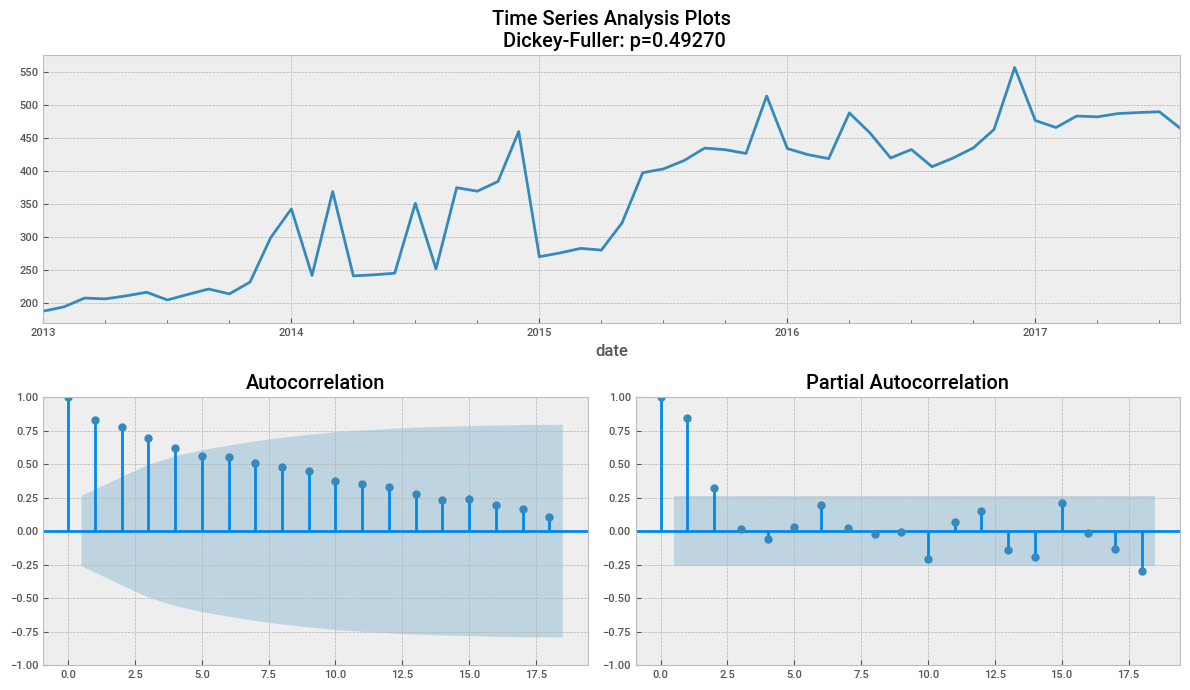

In [ ]:
time_series = new_df_sampled.iloc[:, 0]
tsplot(time_series)


In [ ]:
def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, start_p = 0, start_q = 0, test = "adf", seasonal = False, trace = True)
    
    return autoarima_model

In [ ]:
#arima estimator
estimator_model = arimamodel(new_df_sampled)
estimator_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=824.620, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=618.467, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=766.356, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=608.909, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=610.806, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=610.894, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=608.259, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=655.882, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=615.024, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=609.874, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=610.049, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=685.572, Time=0.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   56
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -300.071
Date:                Tue, 07 Feb 2023   AIC                            608.141
Time:                        20:32:57   BIC                            616.243
Sample:                    01-31-2013   HQIC                           611.282
                         - 08-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     24.6956     28.261      0.874      0.382     -30.695      80.086
ar.L1          0.5403      0.101      5.345      0.000       0.342       0.738
ar.L2          0.3887      0.110      3.533      0.000       0.173       0.604
sigma2      2555.3552    448.189      5.702      0.000    1676.921    3433.790
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 1.98
Prob(Q):                              0.61   Prob(JB):                         0.37
Heteroskedasticity (H):               0.57   Skew:                            -0.26
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#parameter estimation
arima_model = ARIMA(new_df_sampled, order = (2, 1, 3))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   56
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -291.378
Date:                Tue, 07 Feb 2023   AIC                            594.755
Time:                        20:33:04   BIC                            606.799
Sample:                    01-31-2013   HQIC                           599.413
                         - 08-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6113      0.205      2.977      0.003       0.209       1.014
ar.L2         -0.7297      0.160     -4.552      0.000      -1.044      -0.416
ma.L1         -1.1840      0.597     -1.982      0.0

In [ ]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def rmse(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5    
    return rmse

def rmsle(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    log_y_pred = np.log(y_pred + 1)
    log_y_true = np.log(y_true + 1)
    squared_error = (log_y_pred - log_y_true) ** 2
    mean_squared_error = np.mean(squared_error)
    rmsle = mean_squared_error ** 0.5
    return rmsle

#def rmsle(y_pred, y_true):
#    return np.sqrt(np.mean((np.log(y_pred + 1) - np.log(y_true + 1))**2))

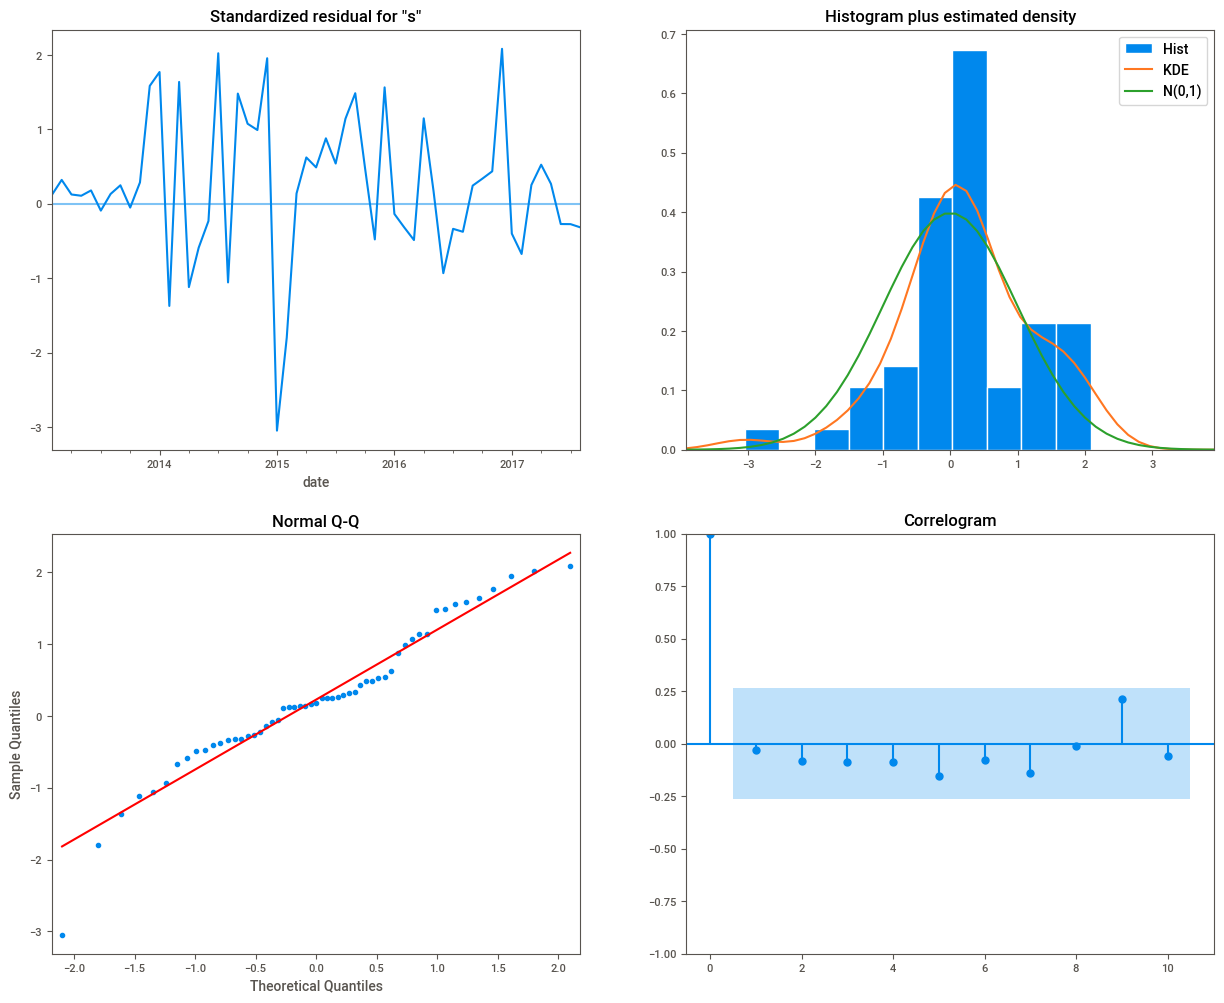

In [ ]:
model.plot_diagnostics(figsize=(15, 12))
plt.show()

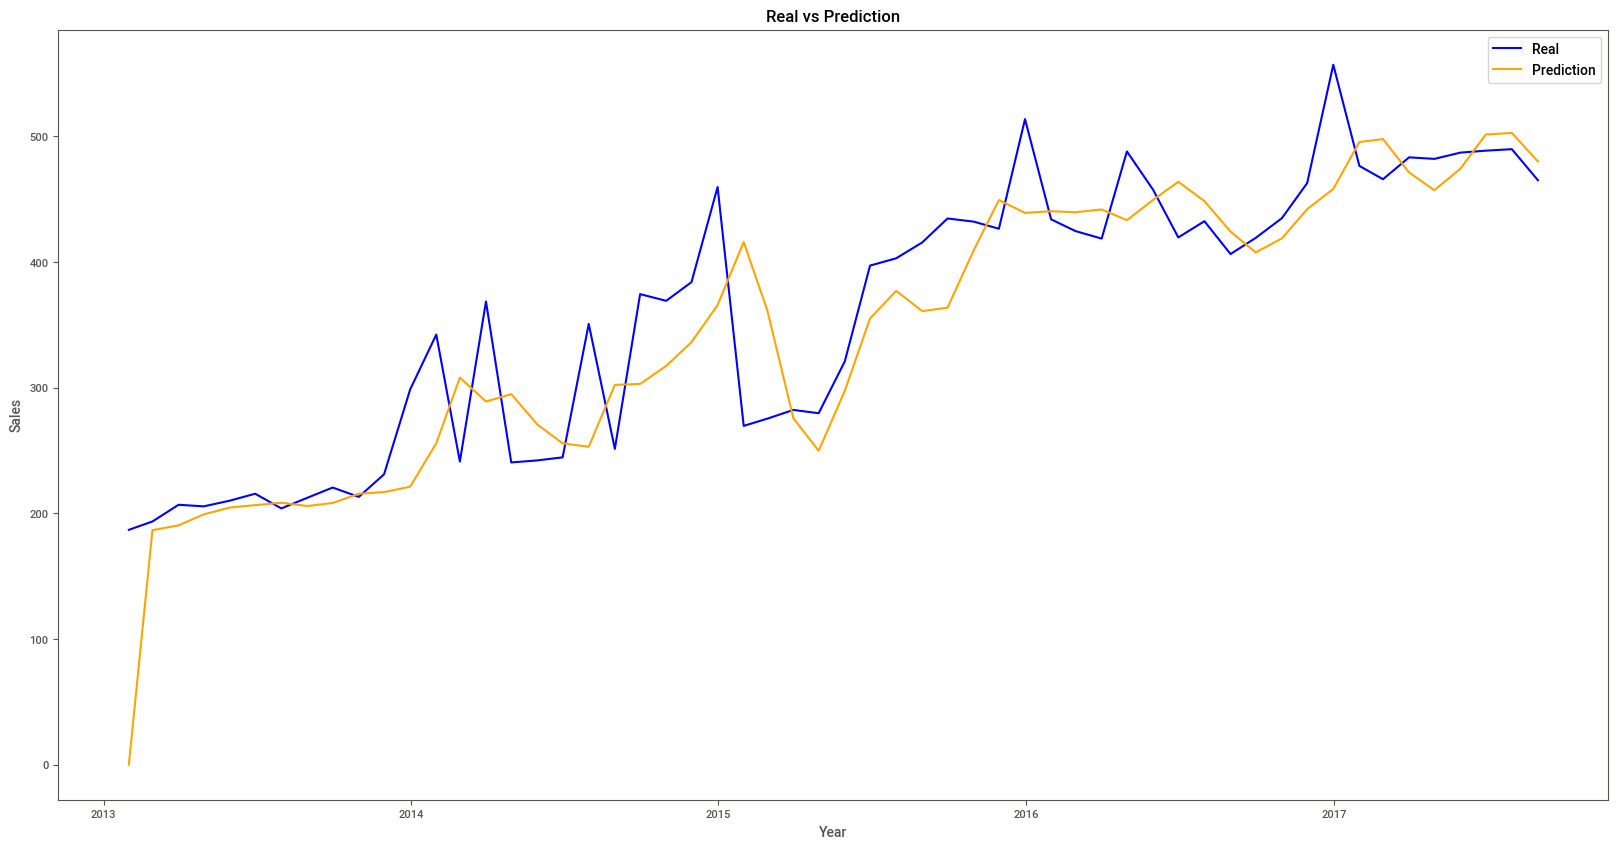

In [ ]:
#in sample forecasting
pred = model.predict(dynamic = False)
pred

plt.figure(figsize = (20, 10))

plt.plot(new_df_sampled, color = 'b', label = 'Real')
plt.plot(pred, color = 'orange', label = 'Prediction')

plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Real vs Prediction')

plt.legend()

plt.show()

In [ ]:
#model accuracy test
model_mape = mape(new_df_sampled, pred)
model_rmse = rmse(new_df_sampled, pred)
model_rmsle = rmsle(new_df_sampled, pred)
print('MAPE: ', model_mape)
print('RMSE: ', model_rmse)
print('RMSLE: ', model_rmsle)

MAPE:  38.78367920388267
RMSE:  53.849507133225046
RMSLE:  0.8992882930565569


In [ ]:
new_df_sampled.tail(10)

,sales
date,
2016-11-30,462.916675
2016-12-31,557.114822
2017-01-31,476.596791
2017-02-28,465.971468
2017-03-31,483.400632
2017-04-30,482.172948
2017-05-31,487.162797
2017-06-30,488.707278
2017-07-31,489.909880


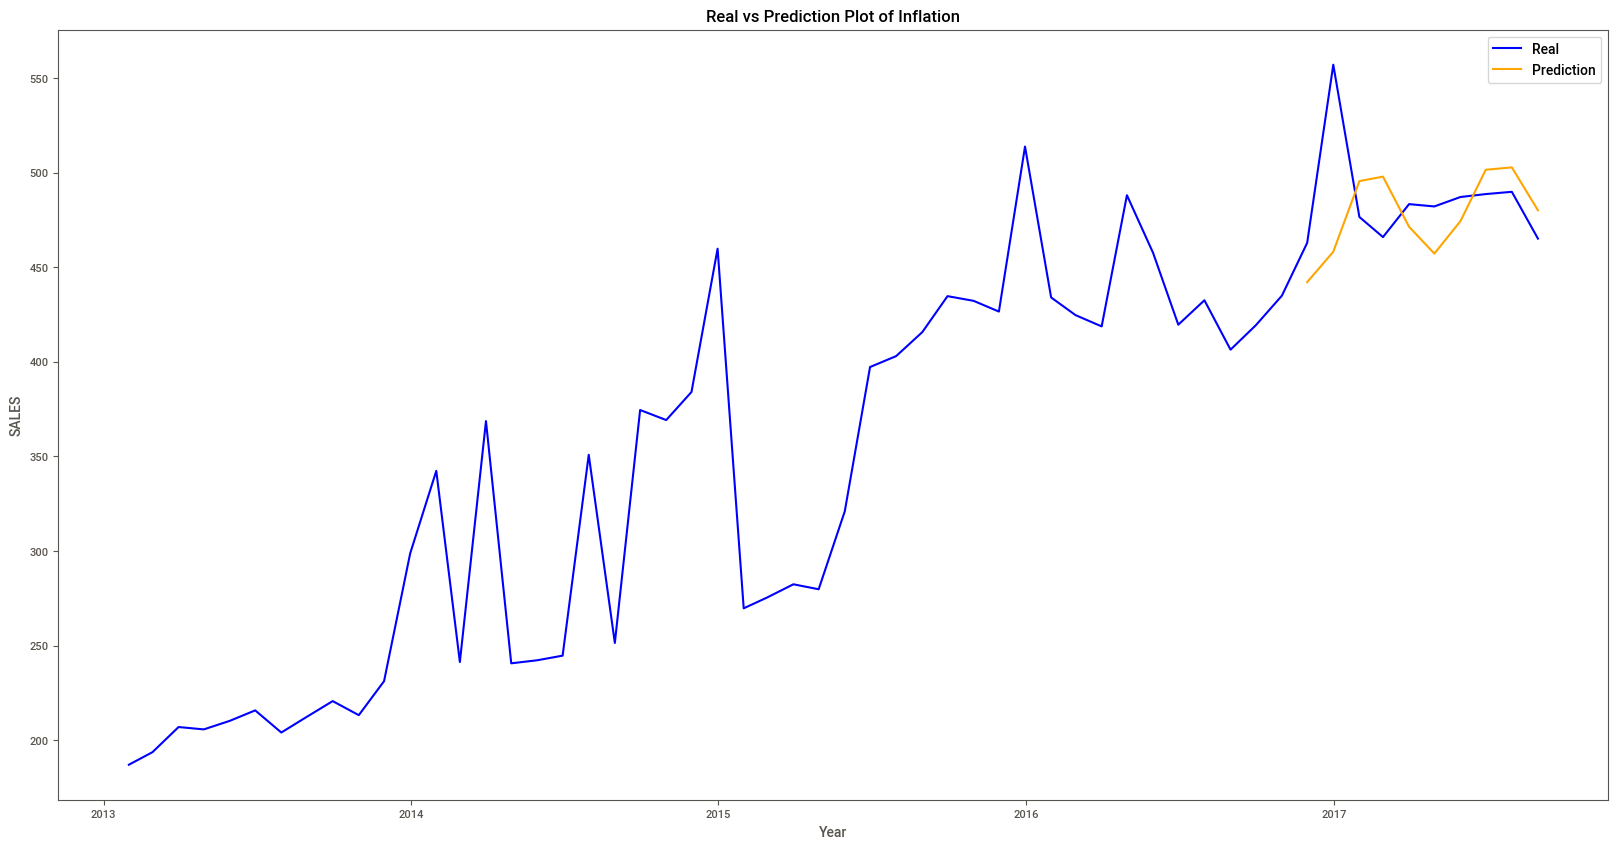

In [ ]:
#out of sample forecasting
pred = model.predict(start=pd.to_datetime('2016-11-30'),end=pd.to_datetime('2017-08-31'))

#plot the predicted values
plt.figure(figsize = (20, 10))
plt.plot(new_df_sampled, color = 'b', label = 'Real')
plt.plot(pred, color = 'orange', label = 'Prediction')
plt.xlabel('Year')
plt.ylabel('SALES')
plt.title('Real vs Prediction Plot of Inflation')
plt.legend()
plt.show()


In [ ]:
pred.describe()

count     10.000000
mean     478.146879
std       21.202544
min      442.149345
25%      461.525390
50%      477.268298
75%      497.346706
max      502.829951
Name: predicted_mean, dtype: float64

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create a SARIMAX model
model = SARIMAX(new_df_sampled, order=(1, 0, 0), seasonal_order=(1, 1, 0, 7))

# Fit the model
results = model.fit()

# Print the results summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             sales   No. Observations:                   56
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 7)   Log Likelihood                -276.321
Date:                           Tue, 07 Feb 2023   AIC                            558.642
Time:                                   20:59:16   BIC                            564.317
Sample:                               01-31-2013   HQIC                           560.795
                                    - 08-31-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6047      0.102      5.931      0.000       0.405       0.805
ar.S.L7       -0.4158      0.145     -2.866      0.004      -0.700      -0.131
sigma2      4469.4004    917.163      4.873      0.000    2671.795    6267.006
===================================================================================
Ljung-Box (L1) (Q):                   4.07   Jarque-Bera (JB):                 1.36
Prob(Q):                              0.04   Prob(JB):                         0.51
Heteroskedasticity (H):               0.25   Skew:                             0.36
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = SARIMAX(new_df_sampled, order=(0, 1, 1), seasonal_order=(1, 1, 1, 12), trend='c', 
                enforce_stationarity=True, enforce_invertibility=True)

sarima_results = model.fit(maxiter=100)

In [ ]:
sarima_results.specification

{'seasonal_periods': 12,
 'measurement_error': False,
 'time_varying_regression': False,
 'simple_differencing': False,
 'enforce_stationarity': True,
 'enforce_invertibility': True,
 'hamilton_representation': False,
 'concentrate_scale': False,
 'trend_offset': 1,
 'order': (0, 1, 1),
 'seasonal_order': (1, 1, 1, 12),
 'k_diff': 1,
 'k_seasonal_diff': 1,
 'k_ar': 0,
 'k_ma': 1,
 'k_seasonal_ar': 12,
 'k_seasonal_ma': 12,
 'k_ar_params': 0,
 'k_ma_params': 1,
 'trend': 'c',
 'k_trend': 1,
 'k_exog': 0,
 'mle_regression': False,
 'state_regression': False}

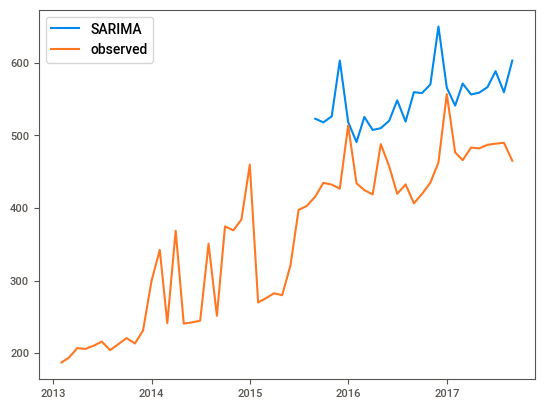

In [ ]:
dates = new_df_sampled.index
# Create SARIMA mean forecast
sarima_pred = sarima_results.get_forecast(25)
sarima_mean = sarima_pred.predicted_mean

# Plot mean ARIMA and SARIMA predictions and observed
plt.plot(dates[-25:], sarima_mean, label='SARIMA');
plt.plot(new_df_sampled, label='observed');
plt.legend();



In [ ]:
def rmsle(y_true, y_pred):
    return np.sqrt(np.mean(np.power(np.log1p(y_true) - np.log1p(y_pred), 2)))

y_true = new_df_sampled.values
y_pred = sarima_mean.values

rmsle_value = rmsle(y_true, y_pred)
print("RMSLE:", rmsle_value)

RMSLE: 0.5758295741012239


## Features Scaling


In [ ]:
# From sklearn.preprocessing use StandardScaler, MinMaxScaler, etc.

## Optional: Train Dataset Balancing 

In [ ]:
# Use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Simple Model #001

Please, keep the following structure to try all the model you want.

### Create the Model

In [ ]:
# Code here

### Train the Model

In [ ]:
# Use the .fit method

### Evaluate the Model on the Evaluation dataset (Evalset)

In [ ]:
# Compute the valid metrics for the use case # Optional: show the classification report 

### Predict on a unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

## Simple Model #002

### Create the Model

In [ ]:
# Code here

### Train the Model

In [ ]:
# Use the .fit method

### Evaluate the Model on the Evaluation dataset (Evalset)

In [ ]:
# Compute the valid metrics for the use case # Optional: show the classification report 

### Predict on a unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

In [ ]:
# Code here

In [ ]:
import joblib

In [ ]:
#Save the model to disk
filename = 'cb_model.joblib'
joblib.dump(model, filename)

['cb_model.joblib']

In [ ]:
if type(model) == cb.CatBoostRegressor:
    joblib.dump(model, filename)
    print("CatBoostRegressor model saved successfully.")
else:
    print("Error: Invalid model type.")


CatBoostRegressor model saved successfully.
